In [36]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
data = pd.read_excel('dataset.xlsx')
df2 = pd.read_excel('dataset.xlsx')

Démarche de travaille 

1. Definir un objectif mesurable

Objectif: predire si une personne est infécté en fonction des donnés clinique de notre dataset

Métrique : on vas se bassser sur plusieur metrique 

Accuracy, Precision, Recall, Score


2. Exploratory data analyse

Analyse de la forme 

Identification de la target 
Nombre de ligne et colones
Type de variable
Identification des valeurs manquantes 

In [3]:
data.head

<bound method NDFrame.head of            Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0     44477f75e8169d2                    13               negative   
1     126e9dd13932f68                    17               negative   
2     a46b4402a0e5696                     8               negative   
3     f7d619a94f97c45                     5               negative   
4     d9e41465789c2b5                    15               negative   
...               ...                   ...                    ...   
5639  ae66feb9e4dc3a0                     3               positive   
5640  517c2834024f3ea                    17               negative   
5641  5c57d6037fe266d                     4               negative   
5642  c20c44766f28291                    10               negative   
5643  2697fdccbfeb7f7                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                                  0   
1                

In [4]:
data = data[['Patient age quantile',
             'SARS-Cov-2 exam result',
             'Patient addmited to regular ward (1=yes, 0=no)',
             'Patient addmited to semi-intensive unit (1=yes, 0=no)',
             'Patient addmited to intensive care unit (1=yes, 0=no)',
             'Hematocrit',
             'Hemoglobin', 
             'Platelets', 
             'Mean platelet volume ',
             'Hb saturation (arterial blood gases)',
            'pCO2 (arterial blood gas analysis)',
              'pH (arterial blood gas analysis)',
             'pO2 (arterial blood gas analysis)',
             'Base excess (arterial blood gas analysis)',
             'HCO3 (arterial blood gas analysis)',
             'Total CO2 (arterial blood gas analysis)',
             'ctO2 (arterial blood gas analysis)'
            ]]

In [5]:
data.replace({'SARS-Cov-2 exam result':{'negative':0,'positive':1}},inplace=True)
print(data['SARS-Cov-2 exam result'])

0       0
1       0
2       0
3       0
4       0
       ..
5639    1
5640    0
5641    0
5642    0
5643    1
Name: SARS-Cov-2 exam result, Length: 5644, dtype: int64


C:\Users\Omar\AppData\Local\Temp\ipykernel_6712\481195173.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'SARS-Cov-2 exam result':{'negative':0,'positive':1}},inplace=True)
C:\Users\Omar\AppData\Local\Temp\ipykernel_6712\481195173.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace({'SARS-Cov-2 exam result':{'negative':0,'positive':1}},inplace=True)


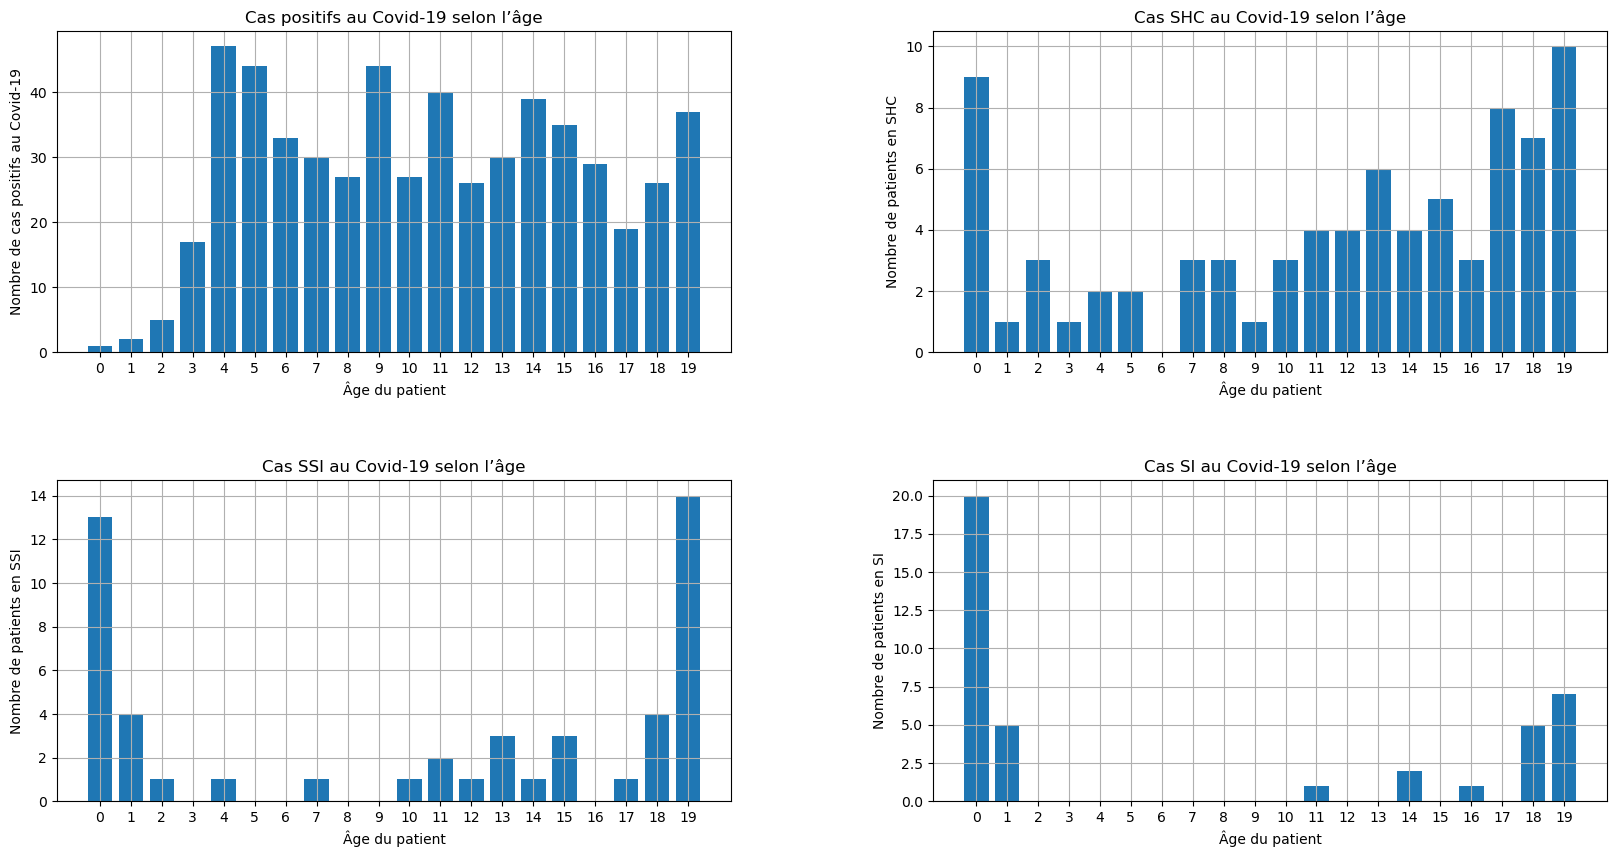

In [6]:
x = data['Patient age quantile']
test_positive = data[data['SARS-Cov-2 exam result'] == 1]
Patient_admis_en_unité_service_hospitalier_classique = data[data['Patient addmited to regular ward (1=yes, 0=no)'] == 1]
Patient_admis_en_unité_de_soins_semi_intensifs = data[data['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1]
Patient_admis_en_unité_de_soins_intensifs = data[data['Patient addmited to intensive care unit (1=yes, 0=no)']==1]

ages = test_positive['Patient age quantile']
unique_ages, counts = np.unique(ages, return_counts=True)

shc = Patient_admis_en_unité_service_hospitalier_classique['Patient age quantile']
unique_shc, counts_shc = np.unique(shc, return_counts=True)

ssi = Patient_admis_en_unité_de_soins_semi_intensifs['Patient age quantile']
unique_ssi, counts_ssi = np.unique(ssi, return_counts=True)

si = Patient_admis_en_unité_de_soins_intensifs['Patient age quantile']
unique_si, counts_si = np.unique(si, return_counts=True)


plt.figure(figsize=(20, 10))  

# Graphe 1
plt.subplot(2, 2, 1)
plt.bar(unique_ages, counts)
plt.xlabel('Âge du patient')
plt.ylabel('Nombre de cas positifs au Covid-19')
plt.title('Cas positifs au Covid-19 selon l’âge')
plt.xticks(unique_ages)
plt.grid(True)

# Graphe 2
plt.subplot(2, 2, 2)
plt.bar(unique_shc, counts_shc)
plt.xlabel('Âge du patient')
plt.ylabel('Nombre de patients en SHC')
plt.title('Cas SHC au Covid-19 selon l’âge')
plt.xticks(unique_ages)
plt.grid(True)

# Graphe 3
plt.subplot(2, 2, 3)
plt.bar(unique_ssi, counts_ssi)
plt.xlabel('Âge du patient')
plt.ylabel('Nombre de patients en SSI')
plt.title('Cas SSI au Covid-19 selon l’âge')
plt.xticks(unique_ages)
plt.grid(True)

# Graphe 4
plt.subplot(2, 2, 4)
plt.bar(unique_si, counts_si)
plt.xlabel('Âge du patient')
plt.ylabel('Nombre de patients en SI')
plt.title('Cas SI au Covid-19 selon l’âge')
plt.xticks(unique_ages)
plt.grid(True)


plt.subplots_adjust(hspace=0.4, wspace=0.3)

plt.show()



On remarque que le nombre d'enfant de zero ans qui sont en SSI sont superieur au nombre d'enfants de zero ans qui sont tester positife aux COVID pk? pour repondre a cette question je vais premierement chercher le nombre d'enfants qui on le covide a zero ans pour voire et checher parmis ceux qui sont hospitaliser les quelles ont LE COVIDE 

In [7]:
test_positive[test_positive['Patient age quantile'] == 0].shape


(1, 17)

In [8]:
age_0 = data[data['Patient age quantile'] == 0]

si_age_0 = age_0[age_0["Patient addmited to intensive care unit (1=yes, 0=no)"] == 1]

si_age_0_covid_positive = si_age_0[si_age_0["SARS-Cov-2 exam result"] == "positive"]

print("Total patients âge 0 en SI :", si_age_0.shape[0])
print("... dont positifs au Covid :", si_age_0_covid_positive.shape[0])


Total patients âge 0 en SI : 20
... dont positifs au Covid : 0


Conclulsion dans notre base de donner on a des gens qui n'ont pas le covide mais qui on ete comme meme hospitaliser . je vais essayer de voire si je refait tout mais avec une quadition en plus prendre dans les cas de SI, SSI, et SHC que le patient doit avoire le covide 

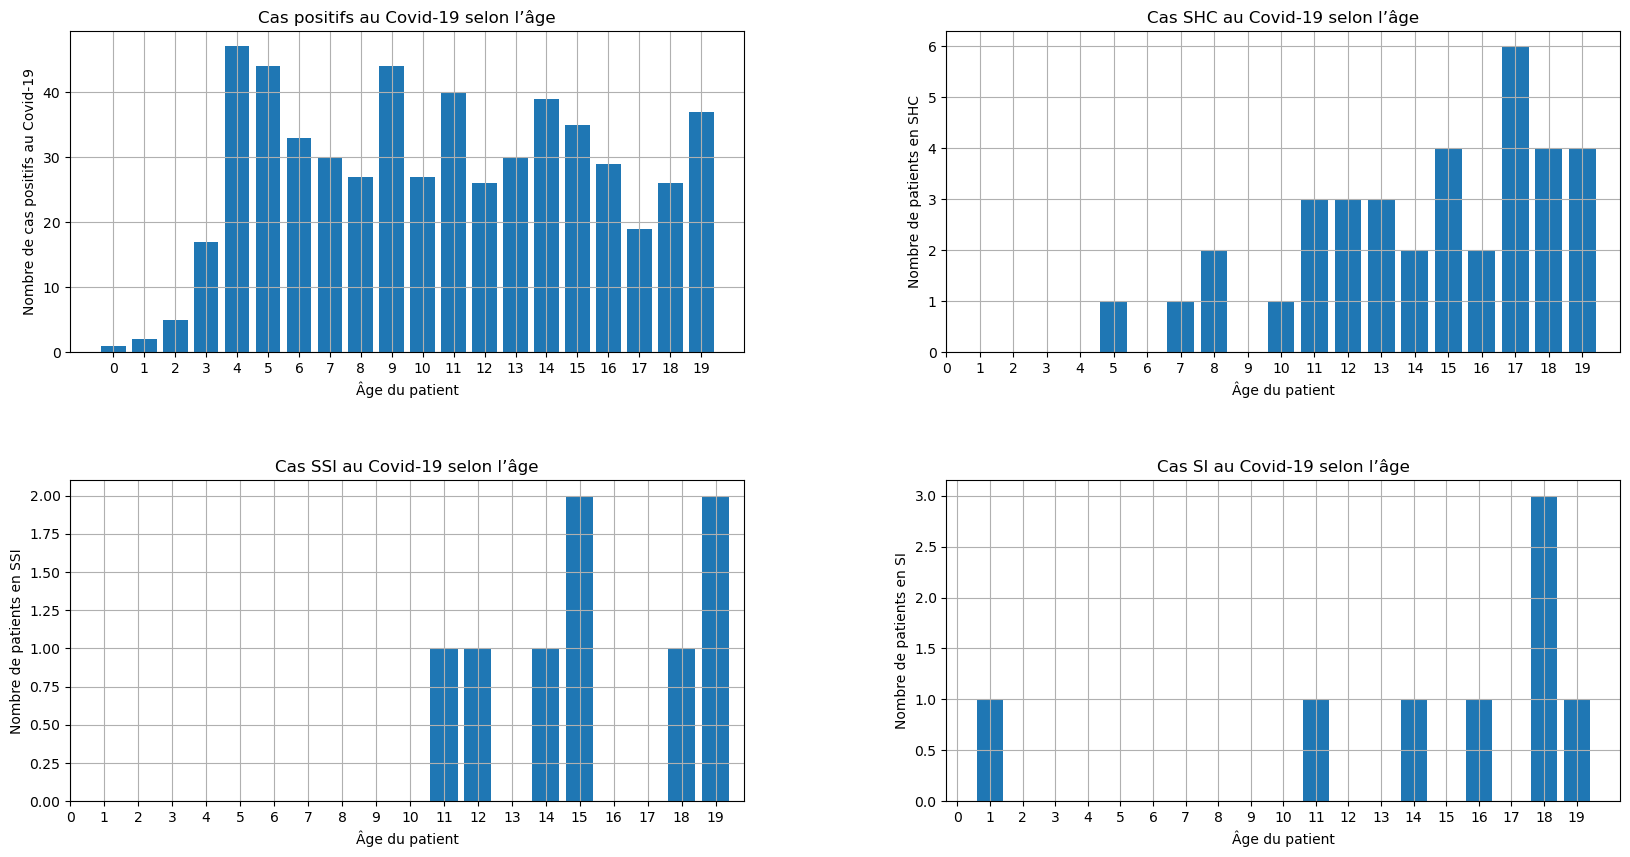

In [9]:
x = data['Patient age quantile']
test_positive = data[data['SARS-Cov-2 exam result'] == 1]
Patient_admis_en_unité_service_hospitalier_classique = data[(data['Patient addmited to regular ward (1=yes, 0=no)'] == 1)&
                                                                (data['SARS-Cov-2 exam result'] == 1)]
Patient_admis_en_unité_de_soins_semi_intensifs = data[(data['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1)&
                                                                (data['SARS-Cov-2 exam result'] == 1)]
Patient_admis_en_unité_de_soins_intensifs = data[(data['Patient addmited to intensive care unit (1=yes, 0=no)']==1)&
                                                                (data['SARS-Cov-2 exam result'] == 1)]

ages = test_positive['Patient age quantile']
unique_ages, counts = np.unique(ages, return_counts=True)

shc = Patient_admis_en_unité_service_hospitalier_classique['Patient age quantile']
unique_shc, counts_shc = np.unique(shc, return_counts=True)

ssi = Patient_admis_en_unité_de_soins_semi_intensifs['Patient age quantile']
unique_ssi, counts_ssi = np.unique(ssi, return_counts=True)

si = Patient_admis_en_unité_de_soins_intensifs['Patient age quantile']
unique_si, counts_si = np.unique(si, return_counts=True)


plt.figure(figsize=(20, 10))  

# Graphe 1
plt.subplot(2, 2, 1)
plt.bar(unique_ages, counts)
plt.xlabel('Âge du patient')
plt.ylabel('Nombre de cas positifs au Covid-19')
plt.title('Cas positifs au Covid-19 selon l’âge')
plt.xticks(unique_ages)
plt.grid(True)

# Graphe 2
plt.subplot(2, 2, 2)
plt.bar(unique_shc, counts_shc)
plt.xlabel('Âge du patient')
plt.ylabel('Nombre de patients en SHC')
plt.title('Cas SHC au Covid-19 selon l’âge')
plt.xticks(unique_ages)
plt.grid(True)

# Graphe 3
plt.subplot(2, 2, 3)
plt.bar(unique_ssi, counts_ssi)
plt.xlabel('Âge du patient')
plt.ylabel('Nombre de patients en SSI')
plt.title('Cas SSI au Covid-19 selon l’âge')
plt.xticks(unique_ages)
plt.grid(True)

# Graphe 4
plt.subplot(2, 2, 4)
plt.bar(unique_si, counts_si)
plt.xlabel('Âge du patient')
plt.ylabel('Nombre de patients en SI')
plt.title('Cas SI au Covid-19 selon l’âge')
plt.xticks(unique_ages)
plt.grid(True)


plt.subplots_adjust(hspace=0.4, wspace=0.3)

plt.show()



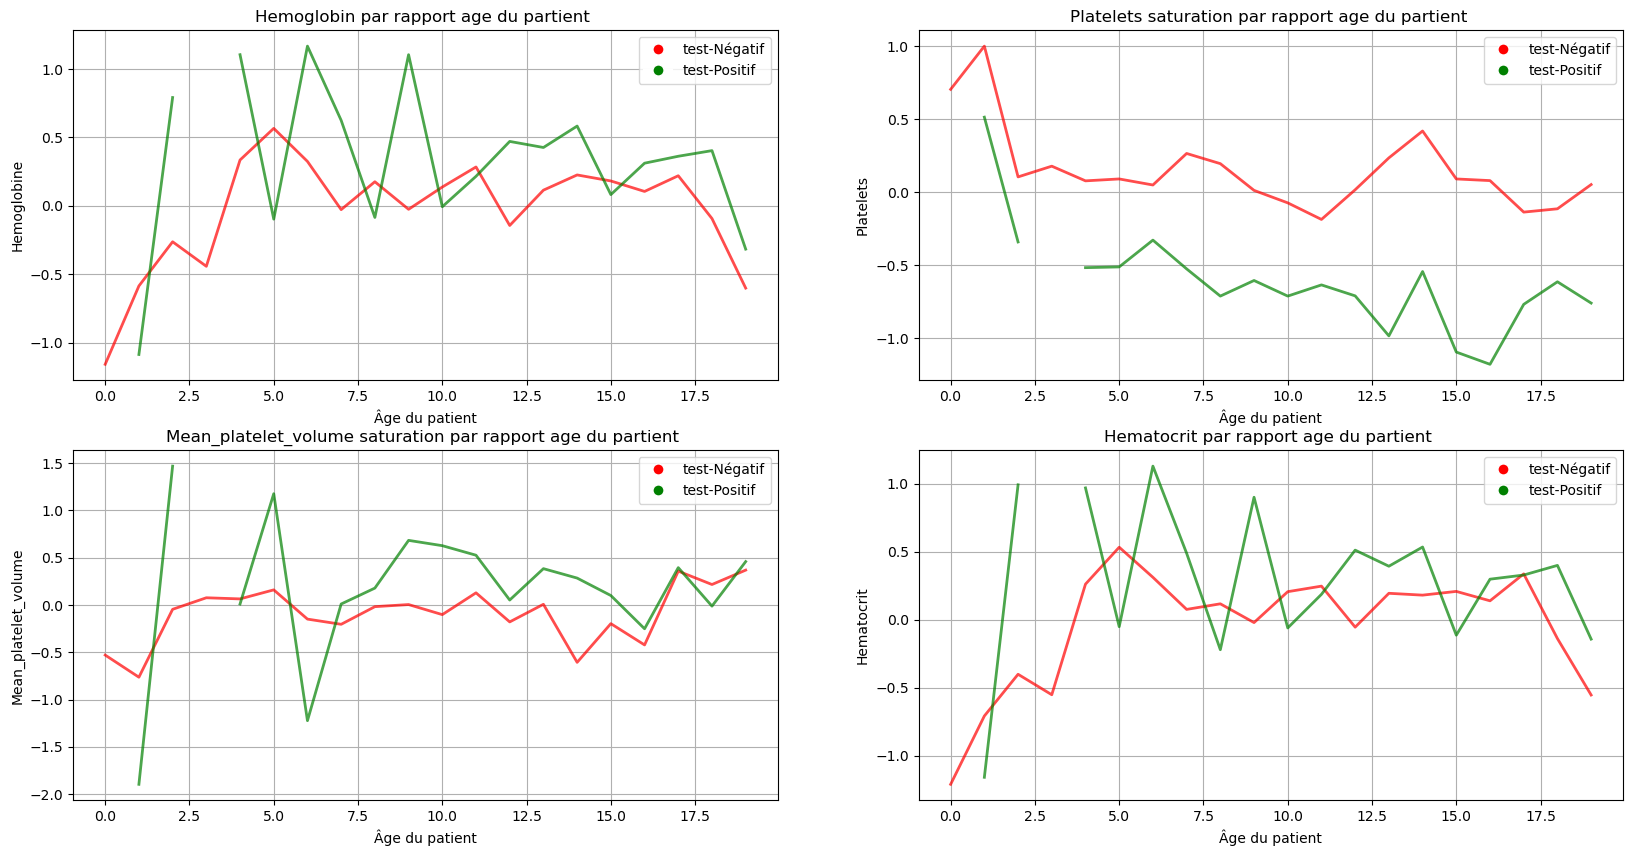

In [10]:
x = data['Patient age quantile']
y = data['Hemoglobin']
c = data['SARS-Cov-2 exam result']
moyennes_test_positife = data[data['SARS-Cov-2 exam result'] == 1].groupby('Patient age quantile')['Hemoglobin'].mean()
moyennes_test_negative = data[data['SARS-Cov-2 exam result'] == 0].groupby('Patient age quantile')['Hemoglobin'].mean()

moyennes_test_positifePlatelets = data[data['SARS-Cov-2 exam result'] == 1].groupby('Patient age quantile')['Platelets'].mean()
moyennes_test_negativePlatelets = data[data['SARS-Cov-2 exam result'] == 0].groupby('Patient age quantile')['Platelets'].mean()

moyennes_test_positifeMean_platelet_volume  = data[data['SARS-Cov-2 exam result'] == 1].groupby('Patient age quantile')['Mean platelet volume '].mean()
moyennes_test_negativeMean_platelet_volume  = data[data['SARS-Cov-2 exam result'] == 0].groupby('Patient age quantile')['Mean platelet volume '].mean()

moyennes_test_positifeHematocrit  = data[data['SARS-Cov-2 exam result'] == 1].groupby('Patient age quantile')['Hematocrit'].mean()
moyennes_test_negativeHematocrit = data[data['SARS-Cov-2 exam result'] == 0].groupby('Patient age quantile')['Hematocrit'].mean()


plt.figure(figsize=(20, 10)) 

#Graphe1
plt.subplot(2, 2, 1)
#plt.scatter(x,y,c=c, alpha=0.7, s=20, cmap='plasma')
plt.plot(moyennes_test_negative.index, moyennes_test_negative.values, color='red', linewidth=2, label='Moyenne test negative Hémoglobine', alpha=0.7)
plt.plot(moyennes_test_positife.index, moyennes_test_positife.values, color='green', linewidth=2, label='Moyenne test positive Hémoglobine' ,alpha=0.7)
plt.xlabel('Âge du patient')
plt.ylabel('Hemoglobine')
plt.title('Hemoglobin par rapport age du partient ')
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='test-Négatif', markerfacecolor='red', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='test-Positif', markerfacecolor='green', markersize=8),
]
plt.legend(handles=legend_elements, loc='upper right')
plt.grid(True)

#Graphe2
plt.subplot(2, 2, 2)
plt.plot(moyennes_test_negativePlatelets.index, moyennes_test_negativePlatelets.values, color='red', linewidth=2, label='Moyenne test negative Platelets', alpha=0.7)
plt.plot(moyennes_test_positifePlatelets.index, moyennes_test_positifePlatelets.values, color='green', linewidth=2, label='Moyenne test positive Platelets' ,alpha=0.7)
plt.xlabel('Âge du patient')
plt.ylabel('Platelets')
plt.title('Platelets saturation par rapport age du partient ')
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='test-Négatif', markerfacecolor='red', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='test-Positif', markerfacecolor='green', markersize=8),
]
plt.legend(handles=legend_elements, loc='upper right')
plt.grid(True)

#Graphe3
plt.subplot(2, 2, 3)
plt.plot(moyennes_test_negativeMean_platelet_volume.index, moyennes_test_negativeMean_platelet_volume.values, color='red', linewidth=2, label='Moyenne test negative Mean_platelet_volume', alpha=0.7)
plt.plot(moyennes_test_positifeMean_platelet_volume.index, moyennes_test_positifeMean_platelet_volume.values, color='green', linewidth=2, label='Moyenne test positive Mean_platelet_volume' ,alpha=0.7)
plt.xlabel('Âge du patient')
plt.ylabel('Mean_platelet_volume')
plt.title('Mean_platelet_volume saturation par rapport age du partient ')
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='test-Négatif', markerfacecolor='red', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='test-Positif', markerfacecolor='green', markersize=8),
]
plt.legend(handles=legend_elements, loc='upper right')
plt.grid(True)

#Graphe4
plt.subplot(2, 2, 4)
plt.plot(moyennes_test_negativeHematocrit.index, moyennes_test_negativeHematocrit.values, color='red', linewidth=2, label='Moyenne test negative Hematocrit', alpha=0.7)
plt.plot(moyennes_test_positifeHematocrit.index, moyennes_test_positifeHematocrit.values, color='green', linewidth=2, label='Moyenne test positive Hematocrit' ,alpha=0.7)
plt.xlabel('Âge du patient')
plt.ylabel('Hematocrit')
plt.title('Hematocrit par rapport age du partient ')


legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='test-Négatif', markerfacecolor='red', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='test-Positif', markerfacecolor='green', markersize=8),
]
plt.legend(handles=legend_elements, loc='upper right')
plt.grid(True)
plt.show()

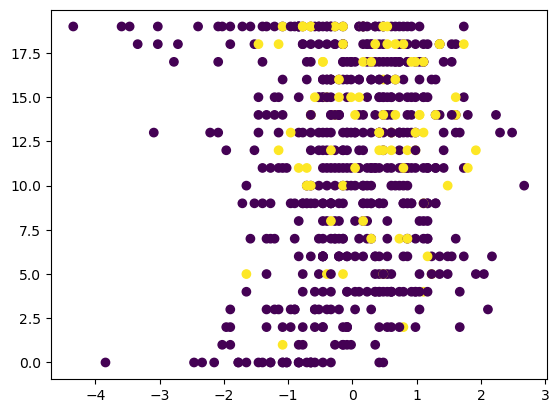

In [11]:
x = data['Patient age quantile']
y =data['Hemoglobin']
c = data['SARS-Cov-2 exam result']
plt.figure()
plt.scatter(y,x,c=c)
plt.show()

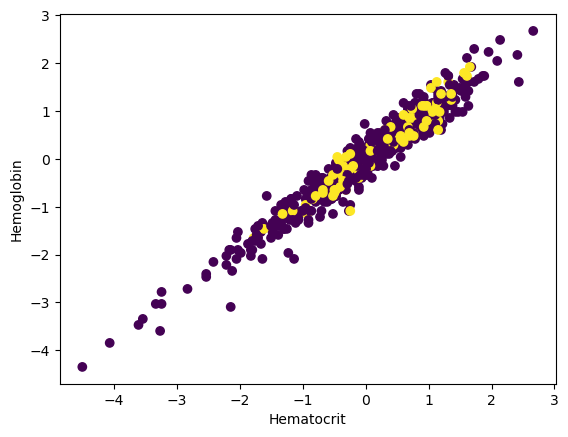

In [12]:
x = data['Hemoglobin']
y =data['Hematocrit']
c = data['SARS-Cov-2 exam result']
plt.figure()
plt.scatter(y,x,c=c)
plt.xlabel('Hematocrit')
plt.ylabel('Hemoglobin')
plt.show()

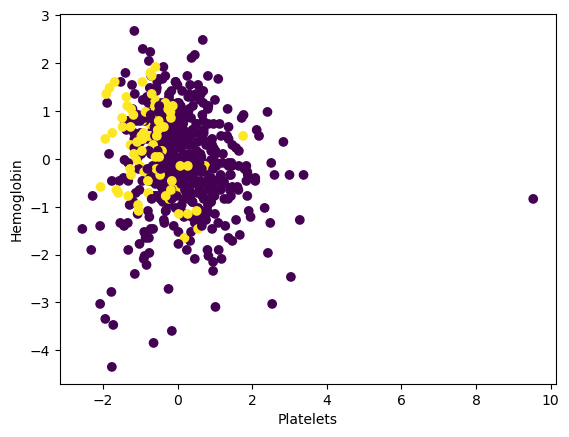

In [13]:
x = data['Hemoglobin']
y =data['Platelets']
c = data['SARS-Cov-2 exam result']
plt.figure()
plt.scatter(y,x,c=c)
plt.xlabel('Platelets')
plt.ylabel('Hemoglobin')
plt.show()


Preprocessing

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

In [15]:
data = data[['Patient age quantile',
             'SARS-Cov-2 exam result',
             'Patient addmited to regular ward (1=yes, 0=no)',
             'Patient addmited to semi-intensive unit (1=yes, 0=no)',
             'Patient addmited to intensive care unit (1=yes, 0=no)',
             'Hematocrit',
             'Hemoglobin', 
             'Platelets', 
             'Mean platelet volume ']]
data.dropna(axis=0,inplace=True)
X = data.drop('SARS-Cov-2 exam result', axis=1)
y = data['SARS-Cov-2 exam result']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)


In [16]:
model1 = KNeighborsClassifier(n_neighbors = 15)
model1.fit(X_train,y_train)
model1.score(X_test,y_test)

0.85

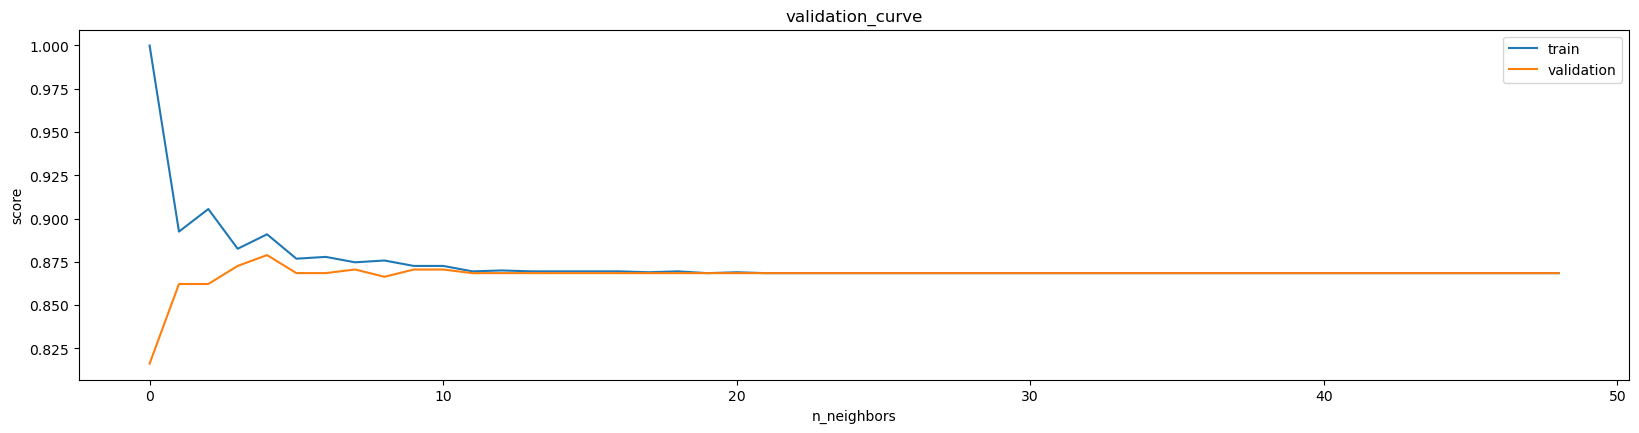

In [17]:
k=np.arange(1,50)
train_score,val_score=validation_curve(model1,X_train,y_train,param_name='n_neighbors',param_range=k,cv=5)

plt.figure(figsize=(20, 10)) 
plt.subplot(2,1,1)
plt.plot(train_score.mean(axis=1),label='train')
plt.plot(val_score.mean(axis=1),label='validation')
plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()
plt.title("validation_curve")
plt.show()

In [18]:
param_grid={'n_neighbors' : np.arange(1,20),
            'weights' : ['uniform','distance'],
            'algorithm' : ['ball_tree','kd_tree','brute','auto'],
            'metric' : ['cityblock','cosine','euclidean','manhattan']}
grid = GridSearchCV(KNeighborsClassifier(),param_grid, cv=10)
grid.fit(X_train,y_train)


print("Best score (cross-validation):", grid.best_score_)
print("Best parameters:", grid.best_params_)


model2 = grid.best_estimator_
print("Test accuracy:", model2.score(X_test, y_test))


Best score (cross-validation): 0.901950354609929
Best parameters: {'algorithm': 'brute', 'metric': 'cosine', 'n_neighbors': 7, 'weights': 'uniform'}
Test accuracy: 0.875


c:\Users\Omar\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
760 fits failed out of a total of 6080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
380 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Omar\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Omar\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Omar\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py", line 238, in fit
    return s

In [21]:
df2.shape


(5644, 111)

In [26]:
df2.dtypes.value_counts()

float64    70
object     37
int64       4
Name: count, dtype: int64

<Axes: ylabel='count'>

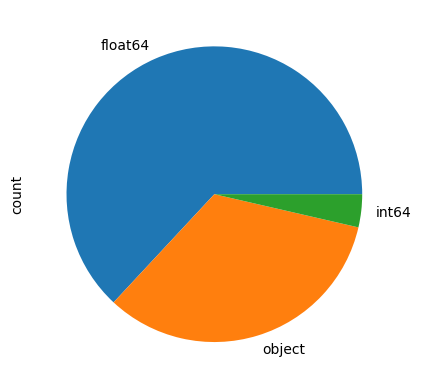

In [28]:
df2.dtypes.value_counts().plot.pie()

 ### Analyse des valuers manquants :
-  beaucoup de NAN ( moitié des variables > 90% de NAN)
- 2 groupes de données tres clairement 
- apres recherche on voie que le groupe de 76% -> Test d'autre bactéries/ virus et pour 89% -> taux de globules rouges/blancs


In [ ]:
pd.set_option('display.max_row',111)
pd.set_option('display.max_column',111)

In [34]:
df2.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

#### affichage du dataset

In [35]:
df2.isna()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True

<Axes: >

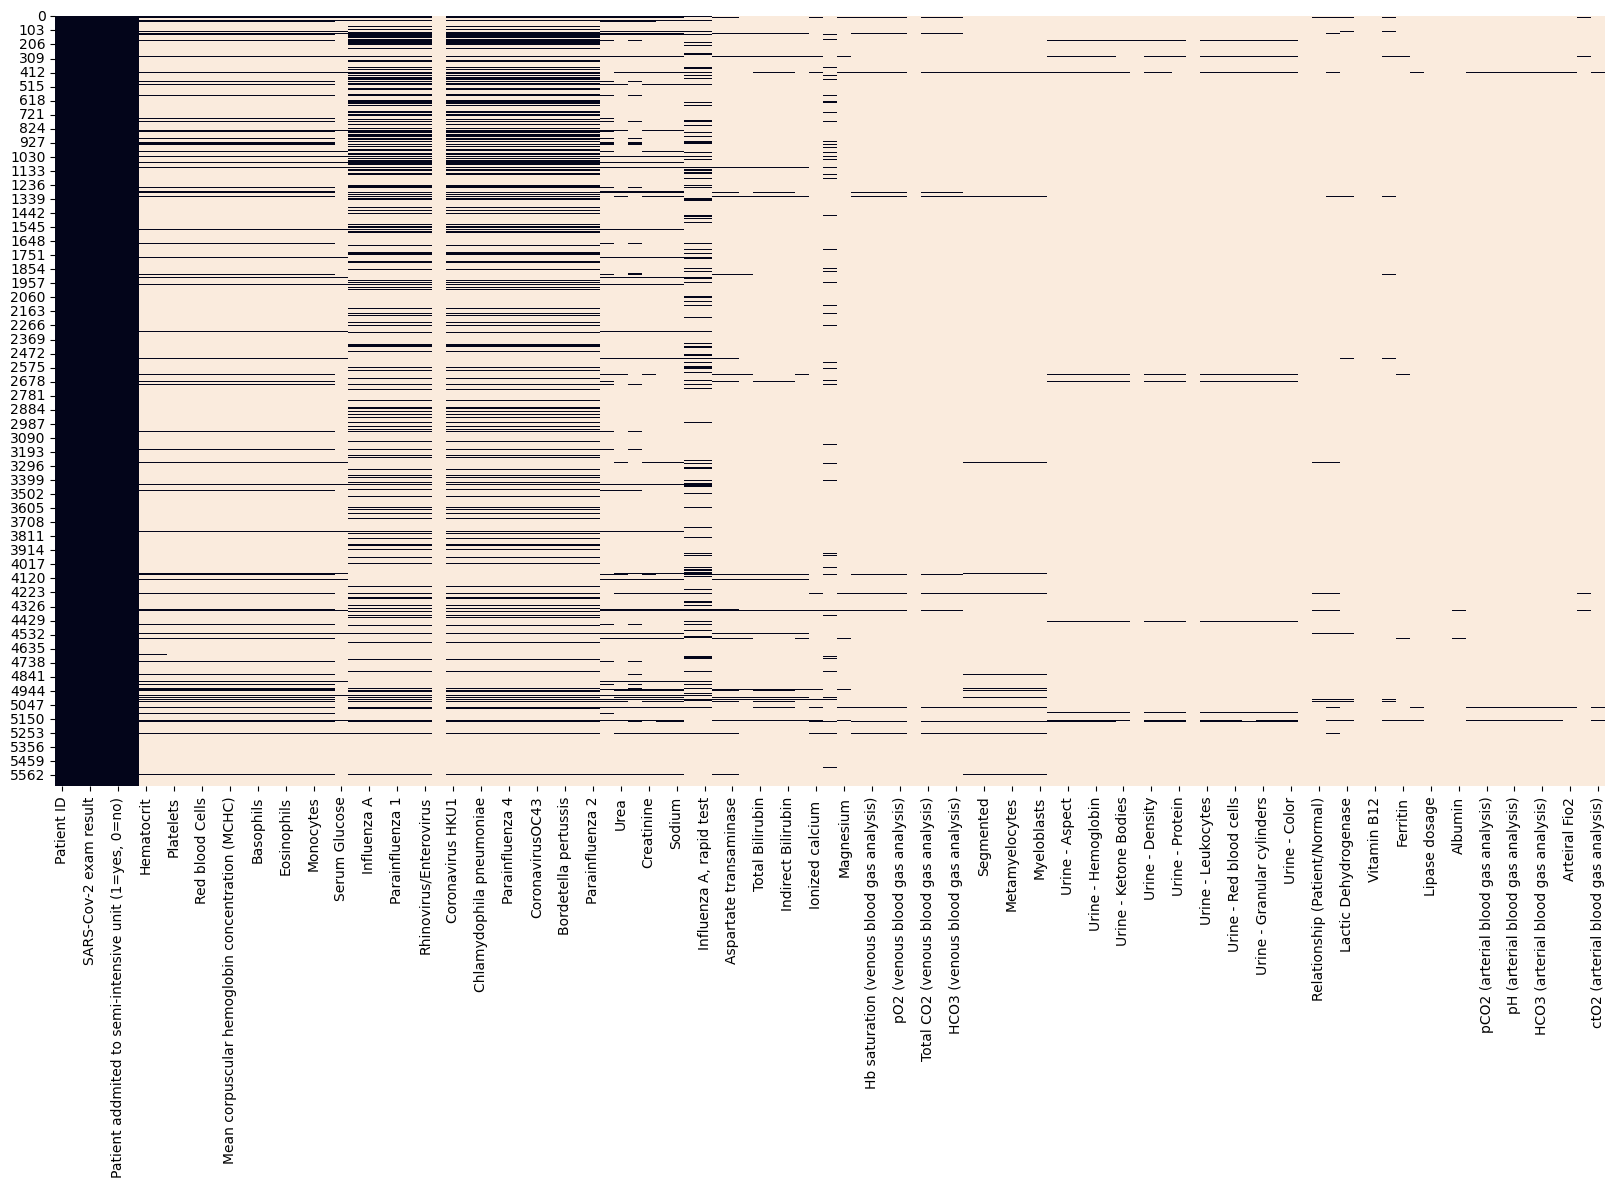

In [39]:
plt.figure(figsize=(20,10)) #faire un figure plus lisible 
sns.heatmap(df2.isna(), cbar=False) # cbar =false pour enlever le bare a droit de la figure 

In [45]:
(df2.isna().sum()/df2.shape[0]).sort_values(ascending=True)

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydoph

### Analyse de fond
1. Visualisation initiale : Elimination des colones inutiles
2. Visualisation de la target :on a 10% de cas positif
3. Signification des variables:
    - variables continues standardisées , skewed(asymétriques),test sanguin
    - age quantile : difficile d'interpreter ce graphique , clairement ces données ont été traitées , on pourrait penser 0-5, mais cela pourrait aussi être une transformation mathématique. on peut pas savoir car le personne qui a mit ce dataset ne le précise nul part . Mais ca n'est pas tres important 

In [48]:
df2 = df2[df2.columns[df2.isna().sum()/df2.shape[0] <0.9]]

<Axes: >

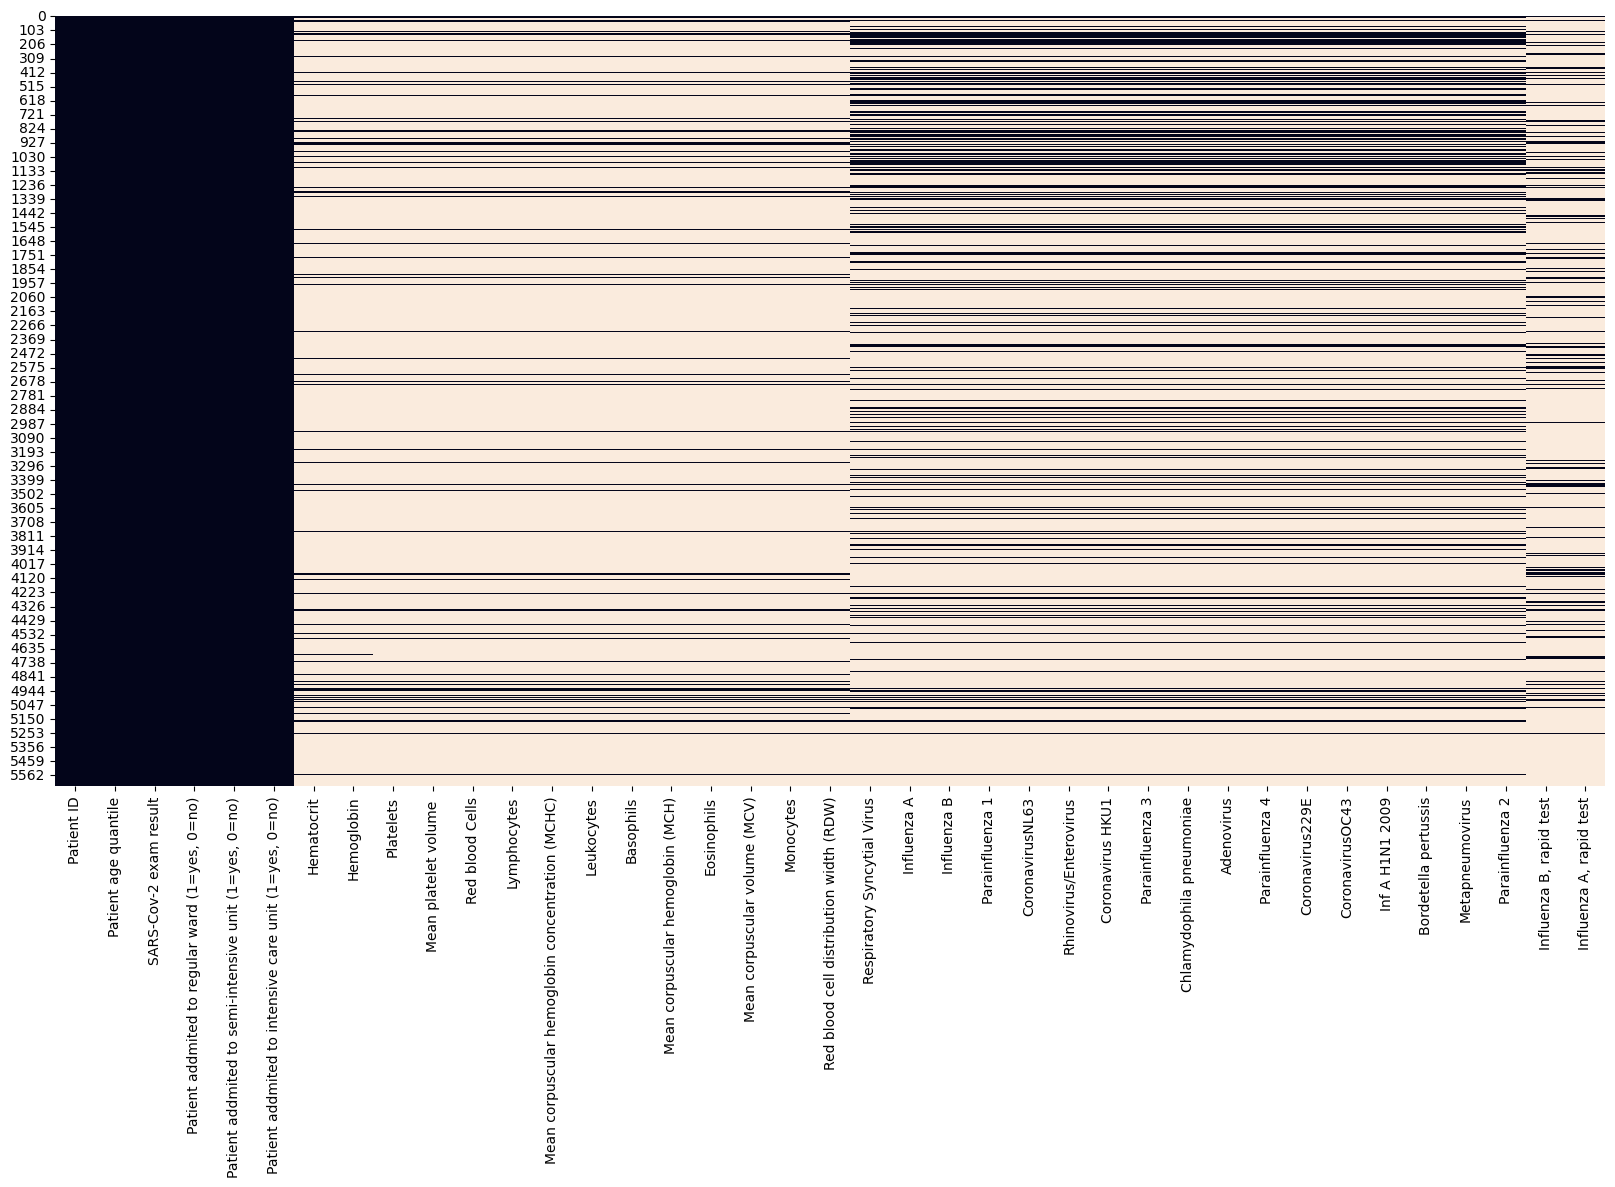

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df2.isna(),cbar=False)

In [52]:
df2['SARS-Cov-2 exam result'].value_counts()

SARS-Cov-2 exam result
negative    5086
positive     558
Name: count, dtype: int64

##### on remarque que nos classes ne sont pas équilibre donc surement utilisation de score f1 ect

histograms des variables continues

C:\Users\Omar\AppData\Local\Temp\ipykernel_6712\2512918135.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

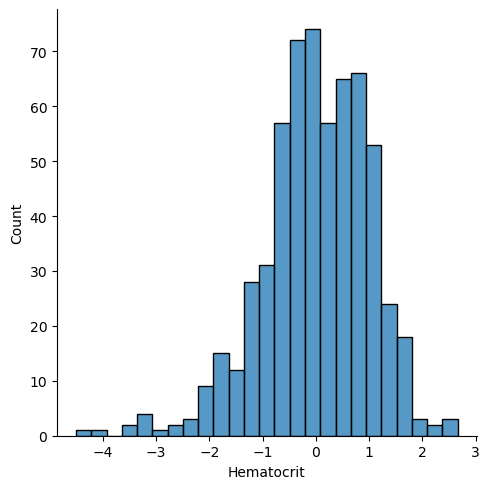

<Figure size 640x480 with 0 Axes>

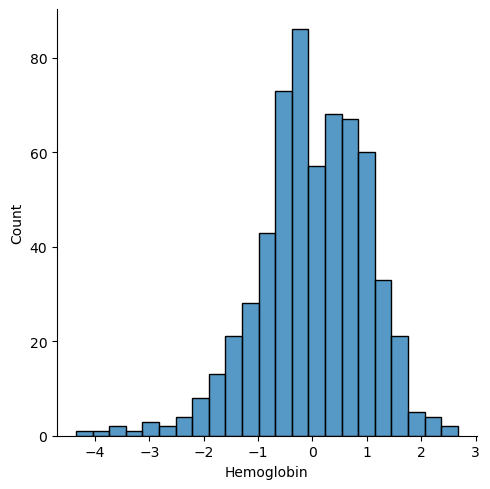

<Figure size 640x480 with 0 Axes>

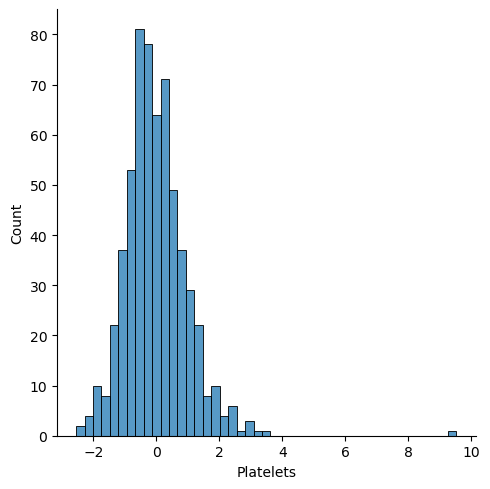

<Figure size 640x480 with 0 Axes>

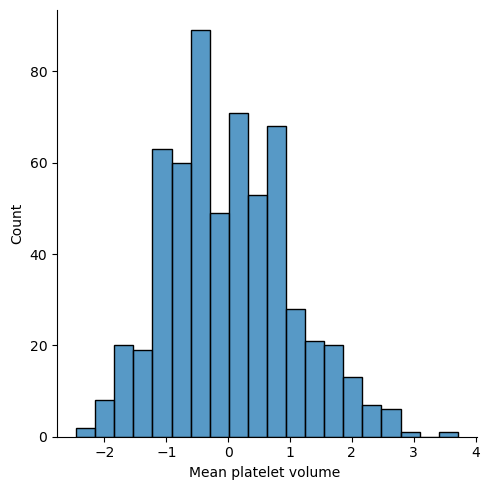

<Figure size 640x480 with 0 Axes>

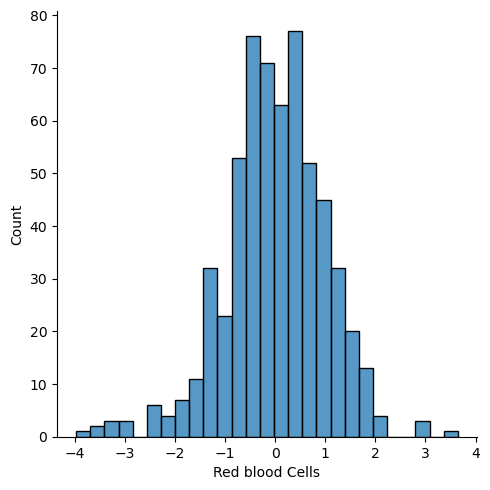

<Figure size 640x480 with 0 Axes>

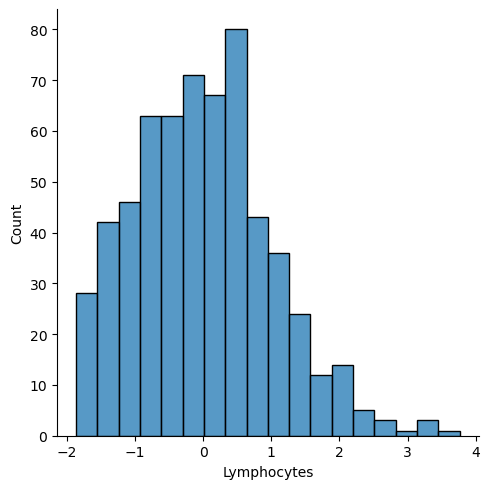

<Figure size 640x480 with 0 Axes>

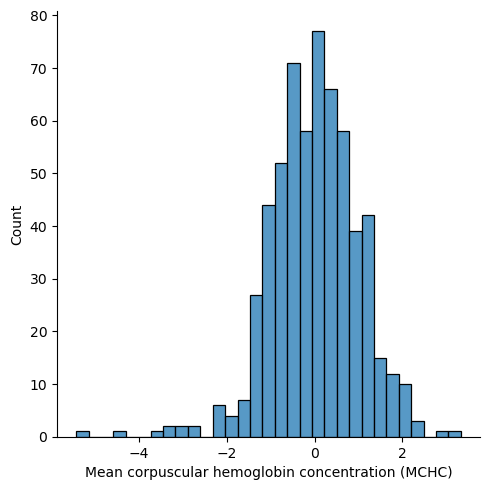

<Figure size 640x480 with 0 Axes>

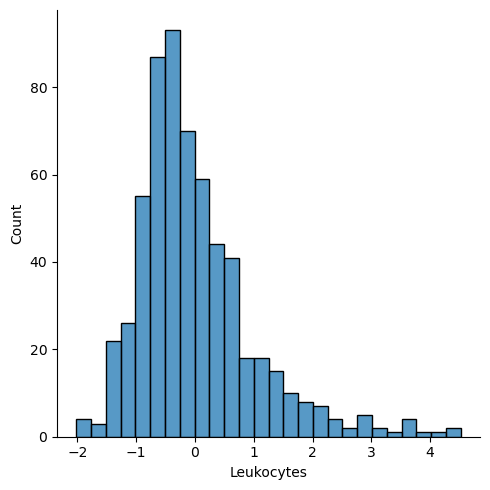

<Figure size 640x480 with 0 Axes>

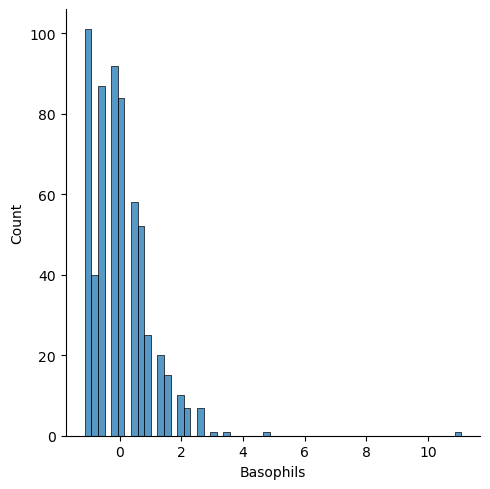

<Figure size 640x480 with 0 Axes>

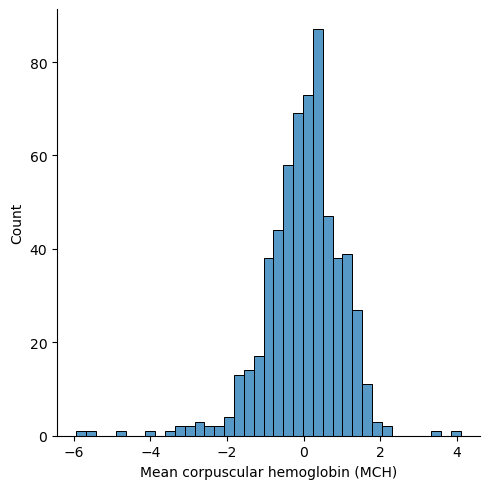

<Figure size 640x480 with 0 Axes>

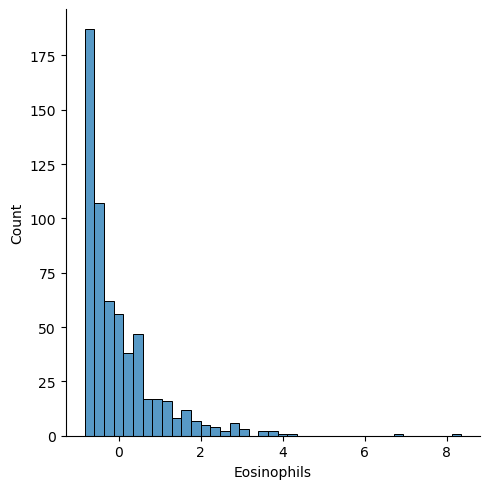

<Figure size 640x480 with 0 Axes>

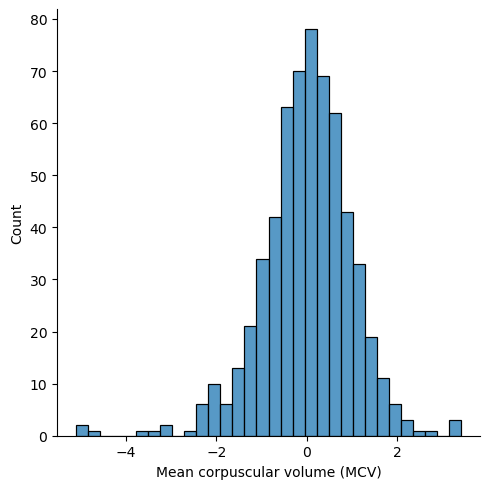

<Figure size 640x480 with 0 Axes>

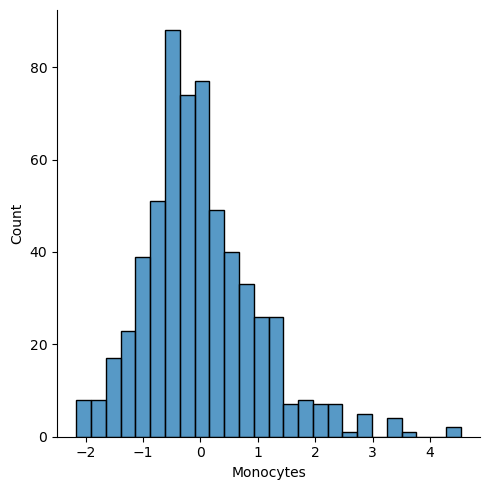

<Figure size 640x480 with 0 Axes>

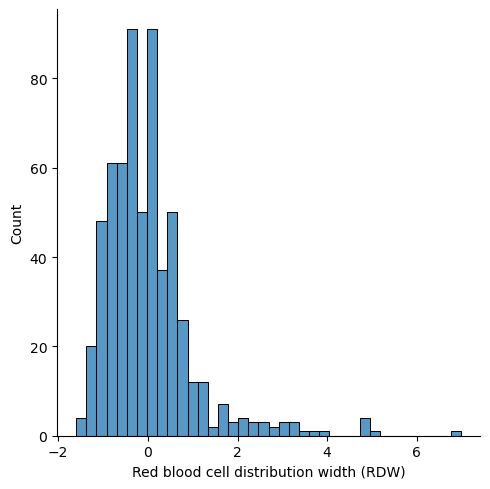

In [55]:
for col in df2.select_dtypes('float'):
    plt.figure()
    sns.displot(df2[col])

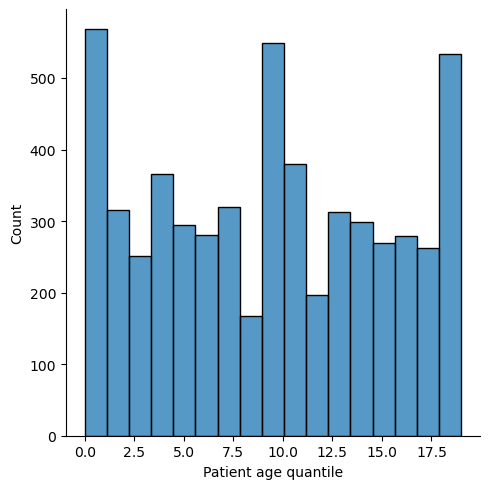

In [56]:
sns.displot(df2['Patient age quantile'])